# Various Optimization Algorithms For Training Neural Network

## 1. Gradient Descent
Gradient Descent is the most basic but most used optimization algorithm. It’s used heavily in linear regression and classification algorithms. Backpropagation in neural networks also uses a gradient descent algorithm.

Gradient descent is a first-order optimization algorithm which is dependent on the first order derivative of a loss function. It calculates that which way the weights should be altered so that the function can reach a minima. Through backpropagation, the loss is transferred from one layer to another and the model’s parameters also known as weights are modified depending on the losses so that the loss can be minimized.

**Advantages:**

- Easy computation.
- Easy to implement.
- Easy to understand.

**Disadvantages:**

- May trap at local minima.
- Weights are changed after calculating gradient on the whole dataset. So, if the dataset is too large than this may take years to converge to the minima.
- Requires large memory to calculate gradient on the whole dataset.

## Stochastic Gradient Descent

It’s a variant of Gradient Descent. It tries to update the model’s parameters more frequently. In this, the model parameters are altered after computation of loss on each training example. So, if the dataset contains 1000 rows SGD will update the model parameters 1000 times in one cycle of dataset instead of one time as in Gradient Descent.

$$θ = θ−α⋅∇J(θ;x_i;y_i)$$ 

where ${x_i ,y_i}$ are the training examples.

As the model parameters are frequently updated parameters have high variance and fluctuations in loss functions at different intensities.

**Advantages:**

- Frequent updates of model parameters hence, converges in less time.
- Requires less memory as no need to store values of loss functions.
- May get new minima’s.
- 
**Disadvantages:**

- High variance in model parameters.
- May shoot even after achieving global minima.
- To get the same convergence as gradient descent needs to slowly reduce the value of learning rate.

In [1]:
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split

# Dữ liệu
df = pd.read_csv('Thyroid_Diff.csv')

type = df.dtypes
column = df.columns

# mã hóa
from sklearn.preprocessing import OneHotEncoder
object_col = df.select_dtypes(['object']).columns.tolist()
encoder = OneHotEncoder(sparse_output=False)
one_hot = encoder.fit_transform(df[object_col])
df = pd.DataFrame(one_hot, columns=encoder.get_feature_names_out(object_col))

df.info()
data = df.values

X = data[:,:-1]
y = data[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Xác định tham số
learning_rate = 0.01  # Tỷ lệ học tập
num_epochs = 20  # Số epoch đào tạo

# Xây dựng mô hình NN
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Biên dịch mô hình
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=learning_rate),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Đào tạo mô hình sử dụng SGD
history = model.fit(X_train, y_train, epochs=num_epochs, batch_size=1)

# Đánh giá mô hình
loss, accuracy = model.evaluate(X_test, y_test)
print('Loss:', loss)
print('Accuracy:', accuracy)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 56 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Gender_F                                          383 non-null    float64
 1   Gender_M                                          383 non-null    float64
 2   Smoking_No                                        383 non-null    float64
 3   Smoking_Yes                                       383 non-null    float64
 4   Hx Smoking_No                                     383 non-null    float64
 5   Hx Smoking_Yes                                    383 non-null    float64
 6   Hx Radiothreapy_No                                383 non-null    float64
 7   Hx Radiothreapy_Yes                               383 non-null    float64
 8   Thyroid Function_Clinical Hyperthyroidism         383 non-null    float64
 9   Thyroid Function_Clin

c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
306/306 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6632 - loss: 0.9505
Epoch 2/20
306/306 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9572 - loss: 0.1451
Epoch 3/20
306/306 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9919 - loss: 0.0703
Epoch 4/20
306/306 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9907 - loss: 0.0491
Epoch 5/20
306/306 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9933 - loss: 0.0394
Epoch 6/20
306/306 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9992 - loss: 0.0362
Epoch 7/20
306/306 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9983 - loss: 0.0205
Epoch 8/20
306/306 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9968 - loss: 0.0192
Epoch 9/20
306/306 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9997 - loss: 0.0159
Epoch 10/20
306/306 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9977 - loss: 0.0124
Epoch 11/20
306/306 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 0.0117
Epoch 12/20
306/306 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

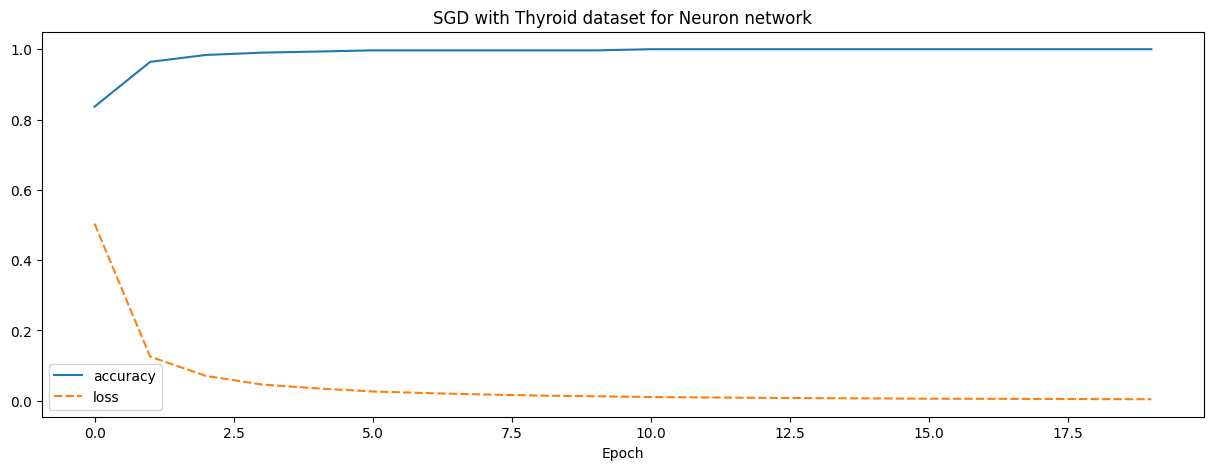

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

losses = pd.DataFrame(history.history)

plt.figure(figsize=(15,5))
sns.lineplot(data=losses)
plt.xlabel('Epoch')
plt.title('SGD with Thyroid dataset for Neuron network')
plt.ylabel('')
plt.show()

## Mini-Batch Gradient Descent

It’s best among all the variations of gradient descent algorithms. It is an improvement on both SGD and standard gradient descent. It updates the model parameters after every batch. So, the dataset is divided into various batches and after every batch, the parameters are updated.

$$θ=θ−α⋅∇J(θ; B_i)$$

where {B(i)} are the batches of training examples.

Advantages:

- Frequently updates the model parameters and also has less variance.
- Requires medium amount of memory.

All types of Gradient Descent have some challenges:

- Choosing an optimum value of the learning rate. If the learning rate is too small than gradient descent may take ages to converge.
- Have a constant learning rate for all the parameters. There may be some parameters which we may not want to change at the same rate.
- May get trapped at local minima.

In [28]:
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split

# Dữ liệu
df = pd.read_csv('Thyroid_Diff.csv')

type = df.dtypes
column = df.columns

# mã hóa
from sklearn.preprocessing import OneHotEncoder
object_col = df.select_dtypes(['object']).columns.tolist()
encoder = OneHotEncoder(sparse_output=False)
one_hot = encoder.fit_transform(df[object_col])
df = pd.DataFrame(one_hot, columns=encoder.get_feature_names_out(object_col))

df.info()
data = df.values

X = data[:,:-1]
y = data[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Xác định tham số
learning_rate = 0.01  # Tỷ lệ học tập
batch_size = 42  # Kích thước mini-batch
num_epochs = 20  # Số epoch đào tạo

# Xây dựng mô hình NN
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Biên dịch mô hình
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=learning_rate),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Đào tạo mô hình sử dụng MBGD
history = model.fit(X_train, y_train, epochs=num_epochs, batch_size=batch_size)

# Đánh giá mô hình
loss, accuracy = model.evaluate(X_test, y_test)
print('Loss:', loss)
print('Accuracy:', accuracy)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 56 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Gender_F                                          383 non-null    float64
 1   Gender_M                                          383 non-null    float64
 2   Smoking_No                                        383 non-null    float64
 3   Smoking_Yes                                       383 non-null    float64
 4   Hx Smoking_No                                     383 non-null    float64
 5   Hx Smoking_Yes                                    383 non-null    float64
 6   Hx Radiothreapy_No                                383 non-null    float64
 7   Hx Radiothreapy_Yes                               383 non-null    float64
 8   Thyroid Function_Clinical Hyperthyroidism         383 non-null    float64
 9   Thyroid Function_Clin

c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0034 - loss: 2.5085      
Epoch 2/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5044 - loss: 1.7061 
Epoch 3/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - accuracy: 0.7410 - loss: 1.1748  
Epoch 4/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7003 - loss: 0.9754 
Epoch 5/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7194 - loss: 0.8052 
Epoch 6/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7338 - loss: 0.7018 
Epoch 7/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7693 - loss: 0.5758 
Epoch 8/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8096 - loss: 0.5361 
Epoch 9/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8516 - loss: 0.4797 
Epoch 10/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8894 - loss: 0.4518 
Epoch 11/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9135 - loss: 0.4104 
Epoch 12/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9189 - loss: 0.3636 
Epoch 1

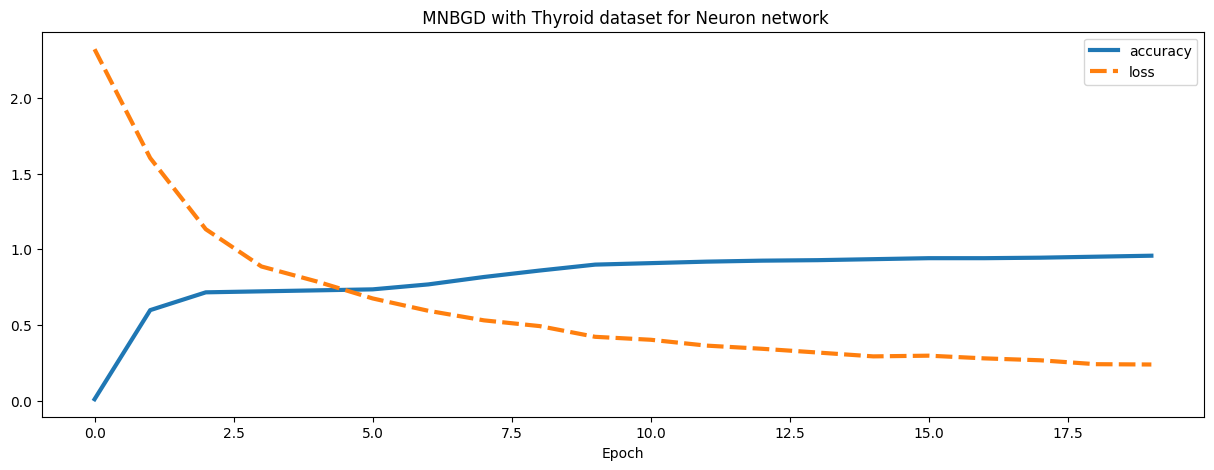

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
losses = pd.DataFrame(history.history)

plt.figure(figsize=(15,5))
sns.lineplot(data=losses,lw=3)
plt.xlabel('Epoch')
plt.title(' MNBGD with Thyroid dataset for Neuron network')
plt.ylabel('')
plt.show()

## Momentum

Momentum was invented for reducing high variance in SGD and softens the convergence. It accelerates the convergence towards the relevant direction and reduces the fluctuation to the irrelevant direction. One more hyperparameter is used in this method known as momentum symbolized by ‘γ’.

$$V_t=γV_{t−1}+α.∇J(θ)$$

Now, the weights are updated by $θ=θ−V_t$.

The momentum term γ is usually set to 0.9 or a similar value.

Advantages:

- Reduces the oscillations and high variance of the parameters.
- Converges faster than gradient descent.

Disadvantages:

- One more hyper-parameter is added which needs to be selected manually and accurately.

Epoch 1/10


c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.4088 - loss: 6.6793 - val_accuracy: 0.7532 - val_loss: 1.9363
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7284 - loss: 1.3712 - val_accuracy: 0.7532 - val_loss: 0.9798
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6419 - loss: 0.8574 - val_accuracy: 0.7532 - val_loss: 0.8203
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4964 - loss: 0.8998 - val_accuracy: 0.7532 - val_loss: 0.6950
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6949 - loss: 0.6482 - val_accuracy: 0.7532 - val_loss: 0.6095
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6968 - loss: 0.6429 - val_accuracy: 0.7532 - val_loss: 0.5792
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7545 - loss: 0.5680 - val_accuracy: 0.7532 - val_loss: 0.5539
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7891 - loss: 0.5261 - val_accuracy: 0.7532 - val_loss: 0.6622
Ep

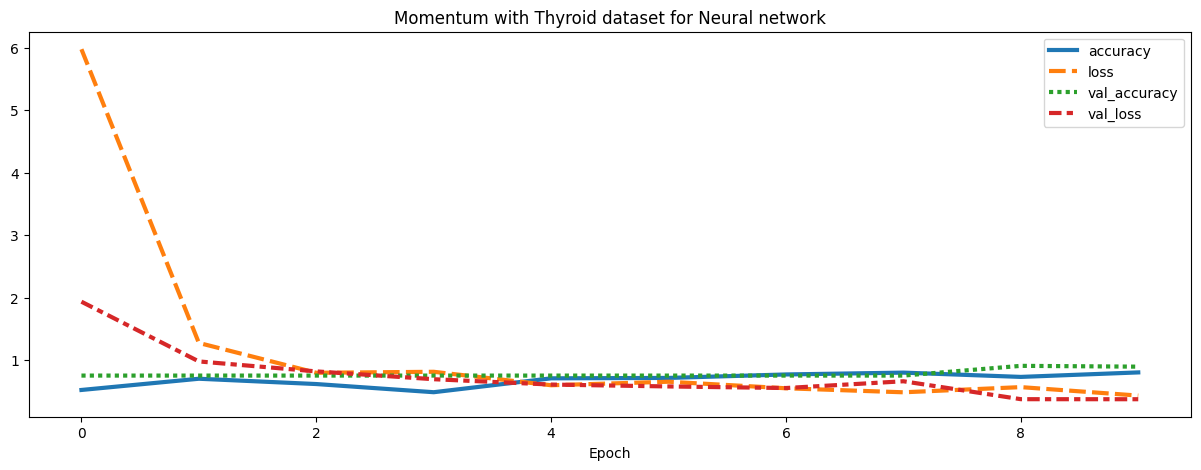

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8895 - loss: 0.3670 
Loss: 0.3746670186519623
Accuracy: 0.8961039185523987


In [5]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Đọc dữ liệu
df = pd.read_csv('Thyroid_Diff.csv')

# Giữ lại cột 'Recurred' trước khi thực hiện One-Hot Encoding
labels = df['Recurred'].values

# Mã hóa các biến phân loại với One-Hot Encoding
categorical_features = df.select_dtypes(include=['object']).columns
one_hot_encoder = OneHotEncoder(sparse_output=False)  # Sửa tham số này

# Áp dụng One-Hot Encoding cho các cột phân loại, trừ cột 'Recurred'
encoded_features = one_hot_encoder.fit_transform(df[categorical_features.drop('Recurred')])
encoded_feature_names = one_hot_encoder.get_feature_names_out(categorical_features.drop('Recurred'))

# Chuyển đổi lại thành DataFrame và nối vào dữ liệu ban đầu
encoded_df = pd.DataFrame(encoded_features, columns=encoded_feature_names)
df = df.drop(categorical_features.drop('Recurred'), axis=1).join(encoded_df)

# Thêm lại cột 'Recurred' vào DataFrame sau khi thực hiện One-Hot Encoding
df['Recurred'] = labels

# Tách dữ liệu thành đầu vào (features) và nhãn (labels)
X = df.drop('Recurred', axis=1).values.astype('float32')  # Chuyển đổi thành float32
y = LabelEncoder().fit_transform(df['Recurred'].values)  # Mã hóa nhãn và chuyển đổi thành int32

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Xác định tham số
learning_rate = 0.01  # Tỷ lệ học tập
momentum = 0.9  # Hệ số momentum
batch_size = 32  # Kích thước mini-batch
num_epochs = 10  # Số epoch đào tạo

# Xây dựng mô hình NN
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Biên dịch mô hình với SGD và momentum
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=momentum),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Đào tạo mô hình sử dụng MBGD với momentum
history = model.fit(X_train, y_train, epochs=num_epochs, batch_size=batch_size, validation_data=(X_test, y_test))

# Trực quan hóa quá trình huấn luyện
losses = pd.DataFrame(history.history)

plt.figure(figsize=(15, 5))
sns.lineplot(data=losses, lw=3)
plt.xlabel('Epoch')
plt.title('Momentum with Thyroid dataset for Neural network')
plt.ylabel('')
plt.show()

# Đánh giá mô hình
loss, accuracy = model.evaluate(X_test, y_test)
print('Loss:', loss)
print('Accuracy:', accuracy)


### Adagrad (Adaptive Gradient Algorithm)

Epoch 1/10


c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.4339 - loss: 2.1341 - val_accuracy: 0.7532 - val_loss: 0.6914
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6675 - loss: 0.7066 - val_accuracy: 0.7532 - val_loss: 0.4826
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7929 - loss: 0.4654 - val_accuracy: 0.9221 - val_loss: 0.4288
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8955 - loss: 0.3988 - val_accuracy: 0.8442 - val_loss: 0.3510
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8731 - loss: 0.3673 - val_accuracy: 0.8442 - val_loss: 0.3336
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9013 - loss: 0.3151 - val_accuracy: 0.9481 - val_loss: 0.3173
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9053 - loss: 0.3065 - val_accuracy: 0.9221 - val_loss: 0.2862
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8924 - loss: 0.3072 - val_accuracy: 0.8831 - val_loss: 0.302

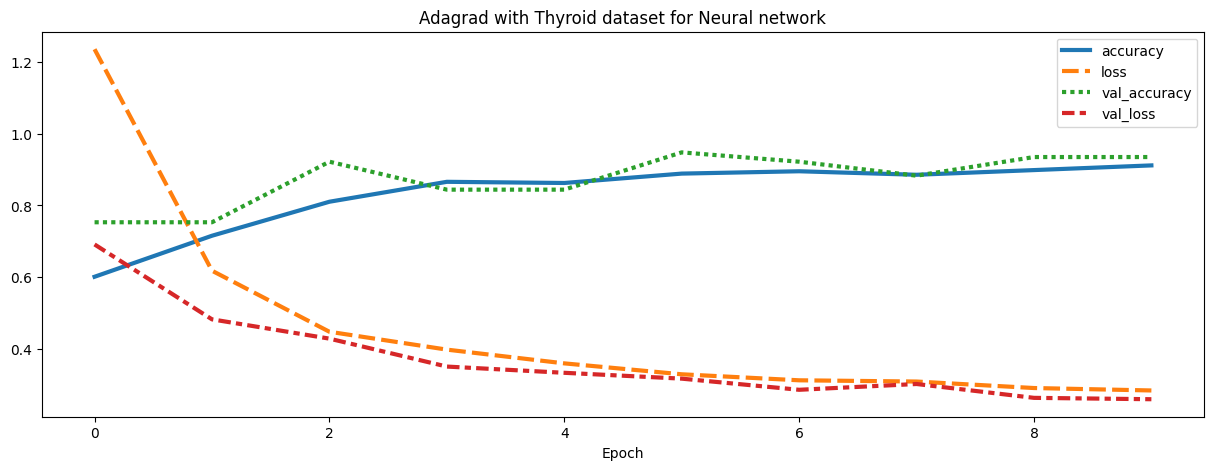

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9285 - loss: 0.2511 
Loss: 0.25992101430892944
Accuracy: 0.9350649118423462


In [7]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Đọc dữ liệu
df = pd.read_csv('Thyroid_Diff.csv')

# Giữ lại cột 'Recurred' trước khi thực hiện One-Hot Encoding
labels = df['Recurred'].values

# Mã hóa các biến phân loại với One-Hot Encoding
categorical_features = df.select_dtypes(include=['object']).columns
one_hot_encoder = OneHotEncoder(sparse_output=False)  # Sửa tham số này

# Áp dụng One-Hot Encoding cho các cột phân loại, trừ cột 'Recurred'
encoded_features = one_hot_encoder.fit_transform(df[categorical_features.drop('Recurred')])
encoded_feature_names = one_hot_encoder.get_feature_names_out(categorical_features.drop('Recurred'))

# Chuyển đổi lại thành DataFrame và nối vào dữ liệu ban đầu
encoded_df = pd.DataFrame(encoded_features, columns=encoded_feature_names)
df = df.drop(categorical_features.drop('Recurred'), axis=1).join(encoded_df)

# Thêm lại cột 'Recurred' vào DataFrame sau khi thực hiện One-Hot Encoding
df['Recurred'] = labels

# Tách dữ liệu thành đầu vào (features) và nhãn (labels)
X = df.drop('Recurred', axis=1).values.astype('float32')  # Chuyển đổi thành float32
y = LabelEncoder().fit_transform(df['Recurred'].values)  # Mã hóa nhãn và chuyển đổi thành int32

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Xác định tham số
learning_rate = 0.01  # Tỷ lệ học tập
batch_size = 32  # Kích thước mini-batch
num_epochs = 10  # Số epoch đào tạo

# Xây dựng mô hình NN
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Biên dịch mô hình với Adagrad
model.compile(optimizer=tf.keras.optimizers.Adagrad(learning_rate=learning_rate),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Đào tạo mô hình sử dụng Adagrad
history = model.fit(X_train, y_train, epochs=num_epochs, batch_size=batch_size, validation_data=(X_test, y_test))

# Trực quan hóa quá trình huấn luyện
losses = pd.DataFrame(history.history)

plt.figure(figsize=(15, 5))
sns.lineplot(data=losses, lw=3)
plt.xlabel('Epoch')
plt.ylabel('')
plt.title('Adagrad with Thyroid dataset for Neural network')
plt.show()

# Đánh giá mô hình
loss, accuracy = model.evaluate(X_test, y_test)
print('Loss:', loss)
print('Accuracy:', accuracy)


###	RMSprop

c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.0000e+00 - loss: 13.3766 - val_accuracy: 0.0000e+00 - val_loss: 6.3570
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0434 - loss: 4.9181 - val_accuracy: 0.6753 - val_loss: 1.1479
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7148 - loss: 0.8655 - val_accuracy: 0.9091 - val_loss: 0.4730
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8627 - loss: 0.4601 - val_accuracy: 0.9091 - val_loss: 0.3737
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8565 - loss: 0.3924 - val_accuracy: 0.8571 - val_loss: 0.3583
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8597 - loss: 0.3435 - val_accuracy: 0.9351 - val_loss: 0.3047
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8677 - loss: 0.3428 - val_accuracy: 0.9221 - val_loss: 0.2808
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8783 - loss: 0.2765 - val_accuracy: 0.8831 -

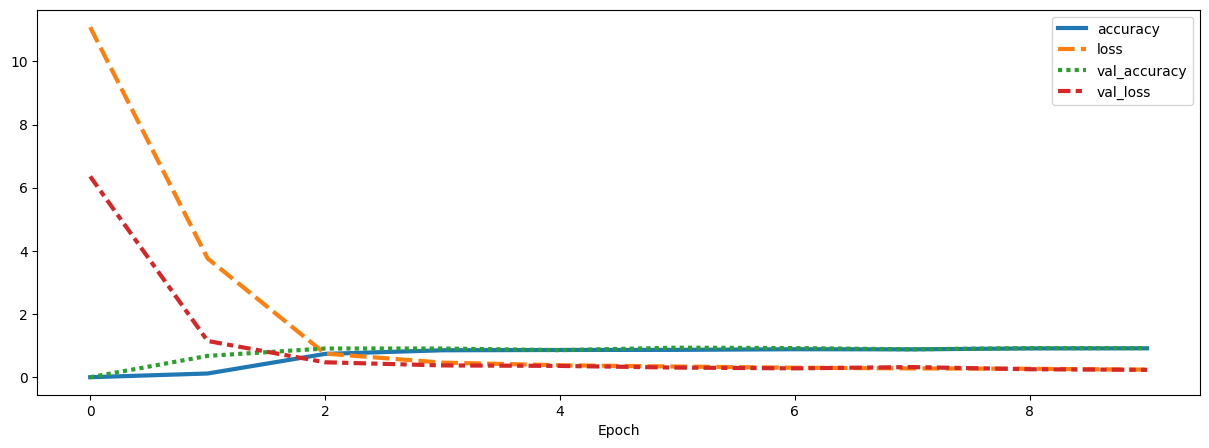

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - accuracy: 0.9181 - loss: 0.2302  
Loss: 0.23371654748916626
Accuracy: 0.9220778942108154


In [9]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Đọc dữ liệu
df = pd.read_csv('Thyroid_Diff.csv')

# Giữ lại cột 'Recurred' trước khi thực hiện One-Hot Encoding
labels = df['Recurred'].values

# Mã hóa các biến phân loại với One-Hot Encoding
categorical_features = df.select_dtypes(include=['object']).columns
one_hot_encoder = OneHotEncoder(sparse_output=False)  # Sửa tham số này

# Áp dụng One-Hot Encoding cho các cột phân loại, trừ cột 'Recurred'
encoded_features = one_hot_encoder.fit_transform(df[categorical_features.drop('Recurred')])
encoded_feature_names = one_hot_encoder.get_feature_names_out(categorical_features.drop('Recurred'))

# Chuyển đổi lại thành DataFrame và nối vào dữ liệu ban đầu
encoded_df = pd.DataFrame(encoded_features, columns=encoded_feature_names)
df = df.drop(categorical_features.drop('Recurred'), axis=1).join(encoded_df)

# Thêm lại cột 'Recurred' vào DataFrame sau khi thực hiện One-Hot Encoding
df['Recurred'] = labels

# Tách dữ liệu thành đầu vào (features) và nhãn (labels)
X = df.drop('Recurred', axis=1).values.astype('float32')  # Chuyển đổi thành float32
y = LabelEncoder().fit_transform(df['Recurred'].values)  # Mã hóa nhãn và chuyển đổi thành int32

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Xác định tham số
learning_rate = 0.001  # Tỷ lệ học tập (hạ thấp learning rate cho RMSprop)
batch_size = 32  # Kích thước mini-batch
num_epochs = 10  # Số epoch đào tạo

# Xây dựng mô hình NN
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Biên dịch mô hình với RMSprop
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=learning_rate),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Đào tạo mô hình sử dụng RMSprop
history = model.fit(X_train, y_train, epochs=num_epochs, batch_size=batch_size, validation_data=(X_test, y_test))

# Trực quan hóa quá trình huấn luyện
losses = pd.DataFrame(history.history)

plt.figure(figsize=(15, 5))
sns.lineplot(data=losses, lw=3)
plt.xlabel('Epoch')
plt.ylabel('')
plt.title('RMSprop with Thyroid ')
plt.show()

# Đánh giá mô hình
loss, accuracy = model.evaluate(X_test, y_test)
print('Loss:', loss)
print('Accuracy:', accuracy)
